In [9]:
# 统计词频
def statis(src, words):
    with open(src, 'r', encoding='utf-8') as f:
        for line in f:
            for word in line.lower().split():
                words[word] = words.get(word, 0) + 1
    return words
words = dict()
words = statis('../input/train.csv', words)
words = statis('../input/test.csv', words)
with open('../input/word.csv', 'w', encoding='utf-8') as fw:
    for k,v in sorted(words.items(), key=lambda x:(x[1], len(x[0])), reverse=True):
        fw.write('{} {}\n'.format(k, v))

In [2]:
import pandas as pd

train = '../input/train.csv'
train = pd.read_csv(train)
print(train['threat'].sum())

305


322552
5.1807894541
3.99947270289


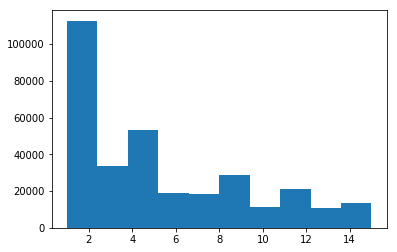

In [35]:
import re,os
import numpy as np
import pylab as pl
# 统计句子数分布
os.system('rm ../input/long.csv')
def statis(src, sents):
    with open(src, 'r', encoding='utf-8') as f, open('../input/long.csv', 'a', encoding='utf-8') as fw:
        for num, line in enumerate(f):
            leng = len(re.split('[,.?!]', line))
            if leng<=15:
                sents.append(leng)
            else:
                leng = len(re.split('[.?!]', line))
                if leng<=15:
                    sents.append(leng)
                else:
                    leng = len(re.split('[?!]', line))
                    if leng<=15:
                        sents.append(leng)
                    else:
                        fw.write(line.strip()+'\n')
    return sents
sents = []
sents = statis('../input/train_data_bpe.csv', sents)
sents = statis('../input/test_data_bpe.csv', sents)
s = np.asarray(sents)
print(len(s))
print(np.mean(s))
print(np.std(s))
pl.hist(s)
pl.show()